In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('placement.csv')

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


We will apply the Z-Score technique if your distrubution is approximately Normal.If the data is not approximately normal then we will use the Another techniques.

## The steps involved in this are:
Outlier Detection
after that Outlier Treating
> For the outlier detection we can use the Z-scores to detect outlier only if the data is normally distrubuted.After Detection we have the Two methods to treat the outliers.
### The two methods are:
     a) Trimming
     b) Capping

## Checking for the normal distrubution using the z scores method.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

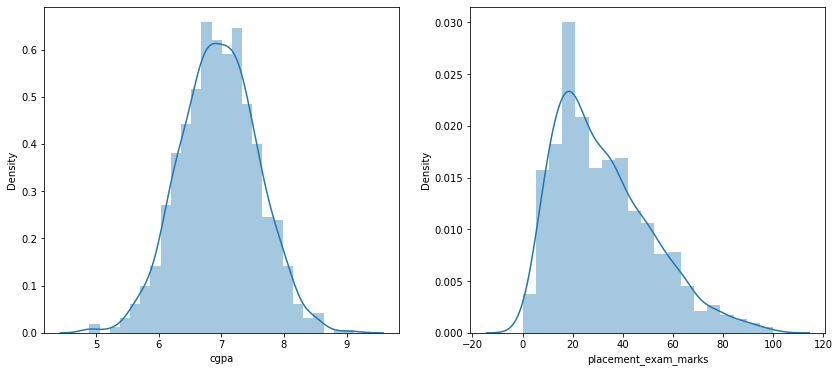

In [16]:
fig=plt.figure(figsize=(14,6))
ax=plt.subplot(121)
sns.distplot(df['cgpa'],ax=ax)
plt.subplot(122)
sns.distplot(df['placement_exam_marks'])

We can see that the cgpa is normally distrubuted.But the placement_exam_marks is not normally distrubuted.So we will apply the Z_Score_Outliers method to only the 'cgpa' column

In [17]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

## To check for normality we can use another method.We can calculate the skew value.
### If the skew values is near to the zero it is normal.If it is not comparable to zero then it is skewed.

In [19]:
df['cgpa'].skew()#normal

-0.014529938929314918

In [20]:
df['placement_exam_marks'].skew()#

0.8356419499466834

In [21]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124000000001
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [25]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [31]:
# Finding the outliers
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]
#df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [37]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming

In [41]:
new_df=df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [52]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [50]:
# Approach 2
# Calculating the Zscore
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [51]:
df['cgpa_zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa_zscore, Length: 1000, dtype: float64

In [53]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [55]:
df[~((df['cgpa_zscore']<-3)|(df['cgpa_zscore']>3))]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [57]:
upper_limit=3
lower_limit=-3
df['cgpa_zscore']=np.where(df['cgpa_zscore']>upper_limit,
                           upper_limit,
                           np.where(df['cgpa_zscore']<lower_limit,
                                    lower_limit,
                                    df['cgpa_zscore']))

In [58]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [60]:
df.shape

(1000, 4)

In capping what we will do is we will replace the values with mean+3standard_deviation if it is greater than mean+3standard_deviation.
We will replace with mean-3standard_deviation if it is less than mean-3standard_deviation.